# Project: Investigate the TMDb Movie Dataset.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#package">Importing Packages</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

#### In today's fast paced technological driven society, various means of entertainments are available and are easily accessible electronically. Movies is one of such entertainment measures and with the advancement of technology, data related to each movie can now be obtained easily.
#### Here, i will be investigating the 2017 TMDb movie dataset sourced from kaggle, with about 10,000 movies.

##### Below are questions we will try to answer based on the 2017 TMDb movies dataset.

    
1. Top/Popular Movies based on budget?
2. What movie made the highest profit based on budget? 
3. What kinds of properties are associated with movies that have high revenues?
    

<a id='package'></a>
## Importing Packages

The first step for any data analysis task will be to import the necessary packages for data analysis and visualization.

In [70]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **info**: In this section of the report, i will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

A: Load the dataset

Here i load the tmdb_movies csv file into a dataframe named movie_df.

In [2]:
movie_df = pd.read_csv('tmdb-movies.csv')

B: Next, is to conduct basic data quality checks.

1. View few rows in the dataset

In [3]:
movie_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


2. Lets have a view of the number of rows and columns in the dataset

In [4]:
movie_df.shape

(10866, 21)

The dataset comprises of 10866 rows and 21 columns.

3. lets get a general information about the dataseT

In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the above table, i found:

1. NULL values is found in these columns (cast, homepage, director, tagline, keywords, overview, genres, production_companies).
2. Movies release_date datatype column is object.
3. Based on the research some columns are irrelevant.
4. Duplicate Rows.

##### C. Data Cleaning
> **info**: In this section of the report, i will clean the dataset for analysis, based on our above findings.

Now lets dive into cleaning

First lets make a copy of our dataframe named df_clean... Reason: we don't want to muck up the original dataset

In [6]:
df_clean = movie_df.copy()

Next lets convert the release_date column to datetime.

In [7]:
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])

Lets view the result.

In [8]:
df_clean['release_date'][0:5]

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

Wow, the release_date column datatype is now in datetime.

Notice that all the columns that contains Null values has an object datatype, and giving this is a movie dataset, we cannot fill up the NULL values with the mode, therefore we will remove the irrelevant column first, then remove rows with NULL values.

Make a list of the undesirable columns.

In [9]:
col_list = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview']

Drop the undesired columns from the dateframe

In [10]:
df_clean.drop(col_list, axis=1, inplace=True)

Lets view the result

In [11]:
df_clean.shape

(10866, 15)

Now we can see that the column has reduced from 21 down to 15

Now lets drop rows with NAN values

In [12]:
df_clean.dropna(inplace=True)
df_clean.shape

(9773, 15)

Now we can also see that the row has reduced from 10866 to 9773.

Lets also see more prove.

In [13]:
df_clean.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Awesome, no NAN values present in our dataset.

Now lets check for duplicates.

In [14]:
df_clean.duplicated().sum()

1

This shows there are only one duplicate row in the entire dataframe.

But giving that the data was not collected from a single data source,  similar movie might have a little variance in the data.

First lets remove the the obvious duplicate before futher findings.

In [15]:
df_clean.drop_duplicates(inplace=True)

In [16]:
df_clean.shape

(9772, 15)

Lets dive deep in finding other duplicates,

we will be using the original_title column for the search.

In [17]:
df_clean['original_title'].duplicated().sum()

260

We can see that 260 movie title are same.

Now lets drop the duplicates.

In [18]:
df_clean.drop_duplicates(subset=['original_title'], inplace=True)
df_clean.shape

(9512, 15)

All necessary cleaning has now be done, therefore we can move to explore the cleaned dataset in other to derive meaningful insights.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Top/Popular Movies based on budget?)

Lets reset the dataset index.

In [ ]:
df_clean.reset_index()

First lets see the Maximum and Minimum movie budget in our dataset.

In [28]:
print('Minimum Budget:',df_clean['budget'].min())
print('Maximum Budget:',df_clean['budget'].max())

Minimum Budget: 0
Maximum Budget: 425000000


Wow; lets get a list of the top Ten movies with the highest budget.

In [90]:
top_mov1 = df_clean.sort_values(by="budget",ascending=False)
top_ten_movies1 = top_mov1[['budget', 'original_title']].iloc[:10].reset_index()
top_ten_movies1.drop('index', axis=1, inplace=True)

Now lets print out the movie titles and budget list.

In [91]:
top_ten_movies1

,budget,original_title
0,425000000,The Warrior's Way
1,380000000,Pirates of the Caribbean: On Stranger Tides
2,300000000,Pirates of the Caribbean: At World's End
3,280000000,Avengers: Age of Ultron
4,270000000,Superman Returns
5,260000000,Tangled
6,260000000,John Carter
7,258000000,Spider-Man 3
8,255000000,The Lone Ranger
9,250000000,The Hobbit: An Unexpected Journey


The number one Movie with the highest budget in the dataset is The Warrior's Way

Nows lets visualize the above table

In [82]:
bud = top_ten_movies1['budget']
title = top_ten_movies1['original_title']

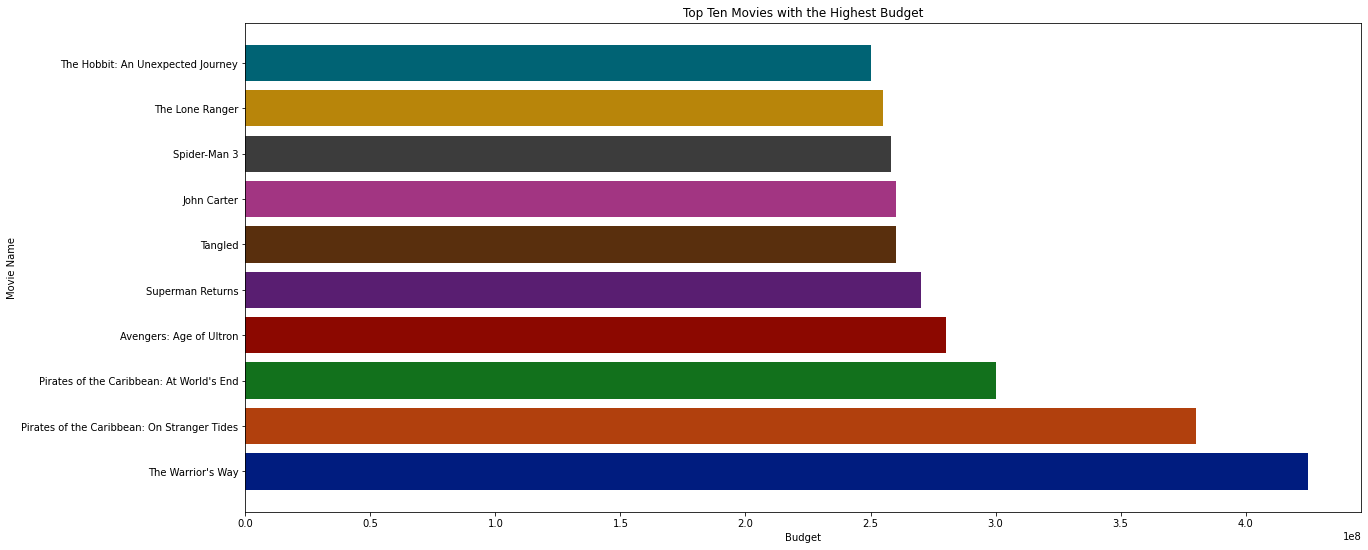

In [85]:
colors = sns.color_palette('dark')
fig = plt.figure(figsize=(20,9))

plt.barh(title, bud, color=colors)
plt.ylabel("Movie Name")
plt.xlabel("Budget")
plt.title("Top Ten Movies with the Highest Budget")

plt.show()


### Research Question 2  (What movie made the highest profit based on budget?)

Here we are going to check the top ten movies that made the highest profit based on their budget.

Lets first create a new profit column --- (revenue - budget)

In [109]:
mov = df_clean[['budget', 'revenue', 'original_title', 'genres']]
mov['profit'] = mov['revenue'] - mov['budget']

C:\Users\sodiq\AppData\Local\Temp/ipykernel_9604/3316588896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov['profit'] = mov['revenue'] - mov['budget']


In [110]:
mov.head()

,budget,revenue,original_title,genres,profit
0,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,1363528810
1,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,228436354
2,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,1868178225
4,190000000,1506249360,Furious 7,Action|Crime|Thriller,1316249360


Now let sort the dataframe from highest to lowest

In [111]:
top_mov2 = mov.sort_values(by="profit",ascending=False)
top_ten_movies2 = top_mov2[['profit', 'original_title', 'budget', 'genres']].iloc[:10].reset_index()
top_ten_movies2.drop('index', axis=1, inplace=True)
top_ten_movies2

,profit,original_title,budget,genres
0,2544505847,Avatar,237000000,Action|Adventure|Fantasy|Science Fiction
1,1868178225,Star Wars: The Force Awakens,200000000,Action|Adventure|Science Fiction|Fantasy
2,1645034188,Titanic,200000000,Drama|Romance|Thriller
3,1363528810,Jurassic World,150000000,Action|Adventure|Science Fiction|Thriller
4,1316249360,Furious 7,190000000,Action|Crime|Thriller
5,1299557910,The Avengers,220000000,Science Fiction|Action|Adventure
6,1202817822,Harry Potter and the Deathly Hallows: Part 2,125000000,Adventure|Family|Fantasy
7,1125035767,Avengers: Age of Ultron,280000000,Action|Adventure|Science Fiction
8,1084279658,The Net,22000000,Crime|Drama|Mystery|Thriller|Action
9,1082730962,Minions,74000000,Family|Animation|Adventure|Comedy


Now lets visualize our findings

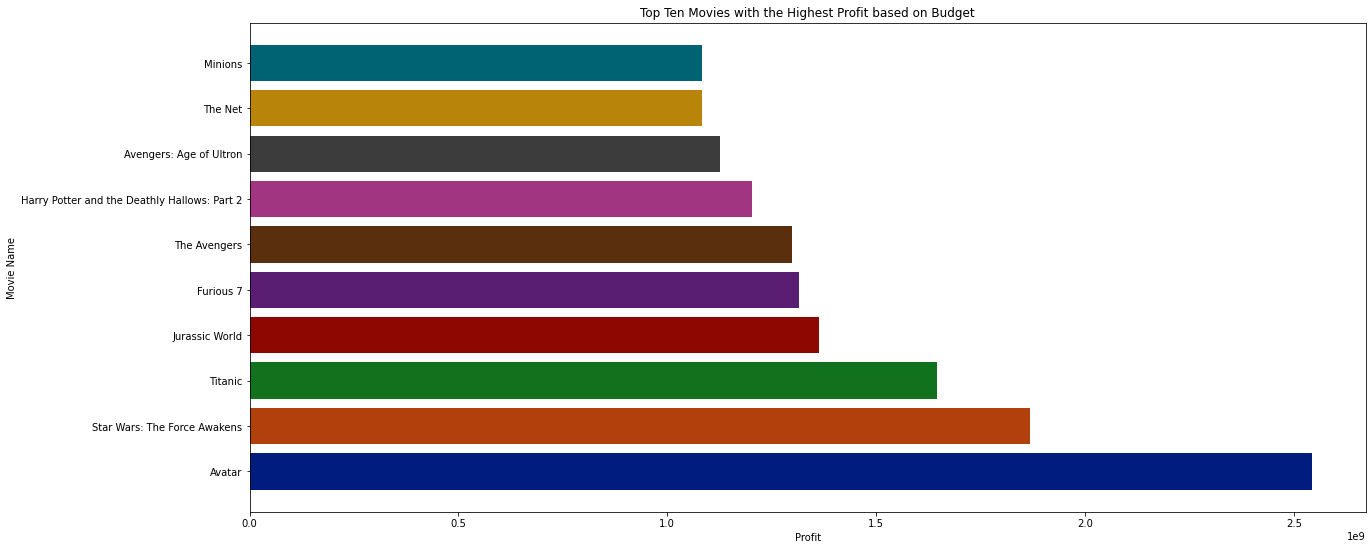

In [88]:
profit = top_ten_movies2['profit']
title = top_ten_movies2['original_title']

fig = plt.figure(figsize=(20,9))

plt.barh(title, profit, color=colors)
plt.ylabel("Movie Name")
plt.xlabel("Profit")
plt.title("Top Ten Movies with the Highest Profit based on Budget")

plt.show()

### Research Question 3  (What kinds of properties are associated with movies that have high revenues?)

First lets get the mean of the revenue, in other a have a metrics to seperate high revenue from low revenue

In [98]:
movie_mean = df_clean['revenue'].mean()
movie_mean

44617676.40054668

The mean == 44617676.4

Now lets filter the dataset between high revenue and low revenue

In [99]:
high_rev_df = df_clean[df_clean['revenue'] > movie_mean]
low_rev_df = df_clean[df_clean['revenue'] < movie_mean]

Now lets find their unique properties

In [106]:
high_rev_df.describe(include='all')

C:\Users\sodiq\AppData\Local\Temp/ipykernel_9604/3861230943.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  high_rev_df.describe(include='all')


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1994.000000,1.994000e+03,1.994000e+03,1994,1994,1994,1994.000000,1994,1994,1994,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
unique,NaN,NaN,NaN,1994,1975,868,NaN,704,1551,1705,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Jurassic World,William Shatner|Leonard Nimoy|DeForest Kelley|...,Steven Spielberg,NaN,Comedy,Paramount Pictures,2013-12-18 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,5,25,NaN,139,52,4,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972-03-15 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2071-12-13 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,1.678299,5.448774e+07,1.937727e+08,NaN,NaN,NaN,112.947844,NaN,NaN,NaN,854.326479,6.286560,2002.296891,6.245213e+07,2.426786e+08
std,1.835449,4.940895e+07,2.092354e+08,NaN,NaN,NaN,24.273225,NaN,NaN,NaN,1087.355209,0.738484,10.375543,5.105930e+07,2.558056e+08
min,0.010335,0.000000e+00,4.470400e+07,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,10.000000,3.400000,1960.000000,0.000000e+00,4.172542e+07
25%,0.761950,2.000000e+07,7.277878e+07,NaN,NaN,NaN,98.000000,NaN,NaN,NaN,208.250000,5.800000,1997.000000,2.609508e+07,9.135197e+07


Below are the properties of High revenue movies

1. They are more popular in the society.
2. The most popular genre in comedy.
3. The tends to have a long runtime with an average of 99.99 minutes.
4. The are produced by big production companies like Universal Pictures.

<a id='conclusions'></a>
## Conclusions


Based on the exploratory data analysis conducted above.

1. I found out that high budget does not necessary correspond to an higher revenue.
2. Action|Adventure|Fantasy|Science|Fiction genre cost more in terms of production.
3. Although Action|Adventure|Fantasy|Science Fiction cost more in production Comedy generates high revenue.